<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Standardization_Understanding_Over_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Standardization***
##### ***Basically we convert the large scale feature values within range -1 to 1 by using standard scaler --> formula --> xi = (xi - mean of x)/sigma = std***
##### ***Mean of features will be 0 and standard deviation will be 1***
##### ***First we fit the data to scaler means it calculates the mean and after that we supply values to the formula***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("/content/Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
df.Salary.mean()
df.Salary = df.Salary.fillna(63000.00)

In [4]:
df.Age.mean()
df.Age = df.Age.fillna(39)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=['Country','Purchased'])
y = df['Purchased']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((7, 2), (3, 2))

In [8]:
scaler = StandardScaler()

In [9]:
# Now we fit the data ---> cal mean and transform it
# We supply only training data for fit and after we can tranform testing and training data both
# Transforming the data means we are supplying the values into formula
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

In [10]:
x_test_scaled = scaler.transform(x_test)

In [11]:
# if we check the train data so it will be a dataframe after scaling it converts it into numpy array
x_train_scaled

array([[-0.20801257,  0.44897083],
       [-1.82588815, -1.41706417],
       [ 0.11556254, -1.0242147 ],
       [ 1.57165056,  1.62751925],
       [-0.04622502, -0.14030338],
       [ 0.92450033,  0.94003267],
       [-0.53158769, -0.43494049]])

In [12]:
x_test_scaled

array([[-1.34052547, -0.82778996],
       [ 1.89522567,  2.02036872],
       [ 0.2773501 ,  0.05612135]])

In [13]:
# lets convert numpy array into data frame
x_train_scaled = pd.DataFrame(x_train_scaled,columns =x_train.columns)

In [14]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [15]:
# lets check original data mean and standard deviation:
x_train.describe()
# mean --> 38
# std --> 6
# this values will use in the formula

,Age,Salary
count,7.000000,7.000000
mean,38.285714,62428.571429
std,6.676184,10997.835285
min,27.000000,48000.000000
25%,36.000000,55000.000000
50%,38.000000,61000.000000
75%,41.500000,69500.000000
max,48.000000,79000.000000


In [16]:
# now if we check the mean of columns and std it will be 0 and 1:
np.round(x_train_scaled.describe())

,Age,Salary
count,7.0,7.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-0.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


Text(0.5, 0.98, 'Before and After Scaling')

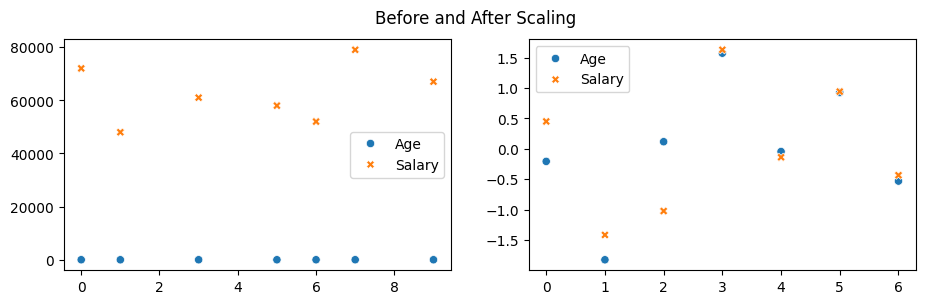

In [51]:
fig,axs = plt.subplots(ncols=2,figsize=(11,3))
sns.scatterplot(data=x_train,ax=axs[0])
sns.scatterplot(data=x_train_scaled,ax=axs[1])
plt.suptitle("Before and After Scaling")

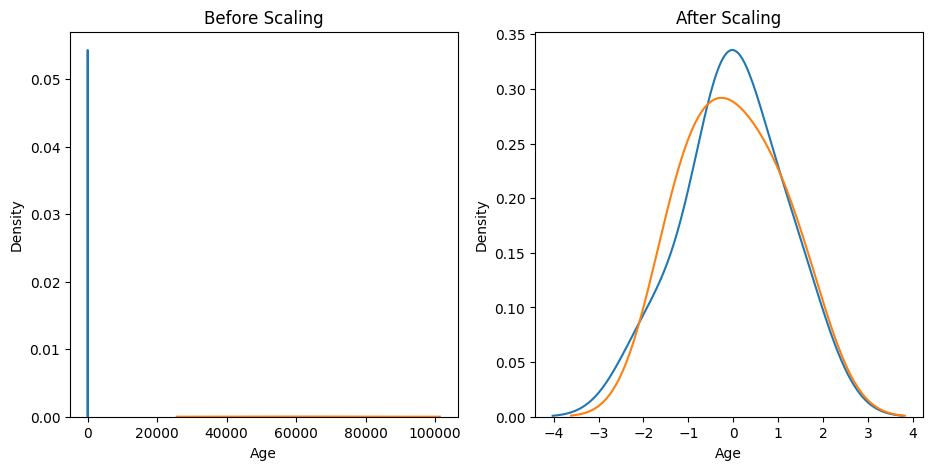

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['Salary'],ax=ax1)

#after scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['Salary'],ax=ax2)
plt.show()

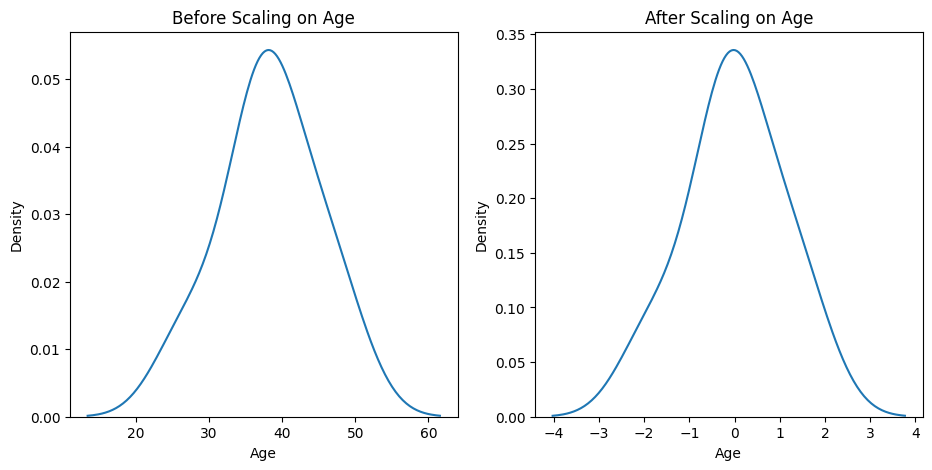

In [55]:
# if we wants to see how it impacts on individual feature
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.set_title("Before Scaling on Age")
sns.kdeplot(x_train['Age'],ax=ax1)

#after scaling
ax2.set_title("After Scaling on Age")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

# The data will be seeing as it is same but scaling will be different

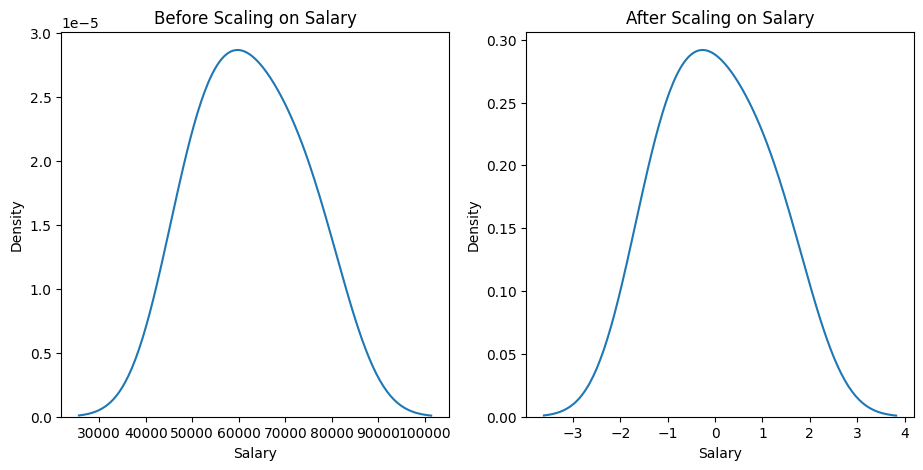

In [56]:
_# if we wants to see how it impacts on individual feature
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.set_title("Before Scaling on Salary")
sns.kdeplot(x_train['Salary'],ax=ax1)

#after scaling
ax2.set_title("After Scaling on Salary")
sns.kdeplot(x_train_scaled['Salary'],ax=ax2)
plt.show()

# The data will be seeing as it is same but scaling will be different

In [17]:
# Now we are going to check the performannce of scaled values and unscaled values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report

In [19]:
model = LogisticRegression()
scaled_model = LogisticRegression()

In [21]:
model.fit(x_train,y_train)
scaled_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)
y1_pred = scaled_model.predict(x_test)

In [30]:
# unscaled:
accuracy_score(y_test,y_pred)*100

0.0

In [28]:
# scaled:
accuracy_score(y_test,y1_pred)*100

33.33333333333333

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier()
scaled_clf = DecisionTreeClassifier()

In [35]:
clf.fit(x_train,y_train)
scaled_clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [37]:
pred = clf.predict(x_test)
pred1 = scaled_clf.predict(x_test_scaled)

In [38]:
accuracy_score(y_test,pred)

0.0

In [39]:
accuracy_score(y_test,pred1)

0.0

In [42]:
# lets see how it is work on outliers:
# lets add some outliers in it
df = df.append(pd.DataFrame({"Country":['Germany','Spain','France'],"Age":[3,95,90],"Salary":[5000,120000,110000],"Purchased":['No','Yes','Yes']}),ignore_index=True)

<ipython-input-42-f260eaa56e61>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Country":['Germany','Spain','France'],"Age":[3,95,90],"Salary":[5000,120000,110000],"Purchased":['No','Yes','Yes']}),ignore_index=True)


In [43]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [45]:
X = df.drop(columns=['Country','Purchased'])
y = df['Purchased']

In [46]:
# Now perform operations:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
# now do standard scale:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [50]:
# lets convert them into dataframe:
scaled_x_train = pd.DataFrame(scaled_x_train,columns=x_train.columns)

In [49]:
scaled_x_test = pd.DataFrame(scaled_x_test,columns=x_train.columns)

After Using Standatrd Scaler there will be no impact on outliers



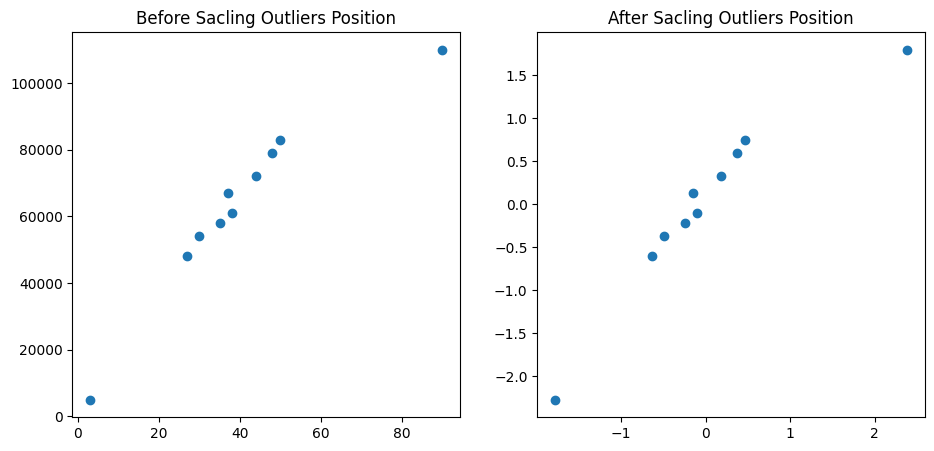

In [60]:
# Now we can see the is there any impact on outliers or they will be seen as it is:
print(f"After Using Standatrd Scaler there will be no impact on outliers\n")
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.set_title("Before Sacling Outliers Position")
ax1.scatter(data=x_train,x="Age",y="Salary")
ax2.set_title("After Sacling Outliers Position")
ax2.scatter(data = scaled_x_train,x="Age",y="Salary")
plt.show()